In [164]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [165]:
import sys
import importlib

sys.path.append('../')

from IPython.display import display, Math, Latex

# From data_preparation classes
from src.finance_ml.data_preparation.data_preparation import DataLoader
from src.finance_ml.principal_component_analysis.principal_component_analysis import PrincipalComponentAnalysis
from src.finance_ml.indicators.indicators import Indicators

In [166]:
# Import required packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import math

## Reading the Data File

In [167]:
# Defining time_index_col (must be the same column in all inputs) and keep_cols refering to the columns that will remain in the dataset
dataloader = DataLoader(time_index_col='DATE',
                        keep_cols=['VOLUME', 'OPEN', 'HIGHT', 'LOW', 'CLOSE', 'VW', 'TRANSACTIONS'])

Here we will select $N=75,000$ ticks from our database for simplicity. We select the equity $\textbf{AAPL}-Apple$ from  the data available.

In [168]:
# Example Files
fname_RUBEUR = 'FX/RUBEUR_2020-04-07_2022-04-06.parquet'
fname_USDBRL = 'FX/USDBRL_2020-04-07_2022-04-06.parquet'
fname_AAPL = 'equities/AAPL_2020-04-07_2022-04-06.parquet'
fname_TSLA = 'equities/TSLA_2020-04-07_2022-04-06.parquet'
fname_KBWY = 'real_estate/KBWY_2020-04-07_2022-04-06.parquet'
fname_SRET = 'real_estate/SRET_2020-04-07_2022-04-06.parquet'
fname_VNQI = 'real_estate/VNQI_2020-04-07_2022-04-06.parquet'

# No. of Records from example dataset
N = 75000

In [169]:
# Dataset chosen in this simulation
ticker = 'AAPL'
fname = fname_AAPL

In [170]:
# loading assets into to an unique df
df = dataloader.load_dataset({ticker: '../data/' + fname}).iloc[:N]
df['MONTH'] = df.index.month
df['MONTH_NAME'] = df.index.strftime('%B')
df['YEAR'] = df.index.year

# Initialize the Principal Component Analysis class with the data

In [171]:
# Create or load some data
data = df
data2 = df
print(data)

                     AAPL_VOLUME  AAPL_OPEN  AAPL_HIGHT  AAPL_LOW  AAPL_CLOSE  \
DATE                                                                            
2020-04-07 12:17:00      14256.0    67.3500     67.3625   67.3275     67.3375   
2020-04-07 12:18:00      16552.0    67.3501     67.3625   67.3250     67.3250   
2020-04-07 12:19:00      80172.0    67.3250     67.4475   67.3250     67.4225   
2020-04-07 12:20:00     183740.0    67.4475     67.4700   67.3125     67.3700   
2020-04-07 12:21:00      35372.0    67.3500     67.3850   67.2975     67.2975   
...                          ...        ...         ...       ...         ...   
2020-08-28 21:53:00       5536.0   125.0550    125.0675  125.0550    125.0675   
2020-08-28 21:54:00       4312.0   125.0950    125.0950  125.0950    125.0950   
2020-08-28 21:55:00       5284.0   125.1000    125.1050  125.1000    125.1050   
2020-08-28 21:56:00       4568.0   125.1250    125.1250  125.1250    125.1250   
2020-08-28 21:57:00      120

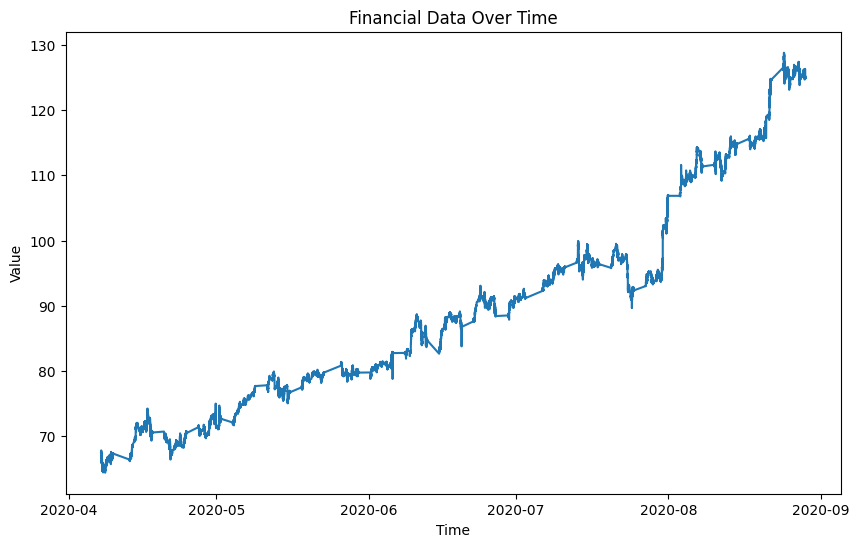

In [172]:
# Plot a Line chart for viewing the entire dataset
plt.figure(figsize=(10, 6))
plt.plot(data['AAPL_OPEN'], label='AAPL_OPEN')
plt.title('Financial Data Over Time')
plt.xlabel('Time')
plt.ylabel('Value')

# Display the plot
plt.show()

# Basic Statistics

In [173]:
data.iloc[:,0:6].describe()

,AAPL_VOLUME,AAPL_OPEN,AAPL_HIGHT,AAPL_LOW,AAPL_CLOSE,AAPL_VW
count,7.500000e+04,75000.000000,75000.000000,75000.000000,75000.000000,75000.000000
mean,1.974512e+05,90.125900,90.160283,90.091388,90.125987,90.123593
std,3.238240e+05,16.454091,16.459286,16.448563,16.454155,16.452639
min,4.000000e+02,64.360000,64.405000,64.241400,64.405000,63.580500
25%,5.284000e+03,77.216875,77.242500,77.204375,77.224375,77.214675
50%,1.105200e+05,88.500000,88.532500,88.475000,88.500000,88.497850
75%,2.818610e+05,97.450000,97.487500,97.412500,97.450000,97.450600
max,1.657370e+07,128.825000,128.995000,128.760200,128.812500,128.796600


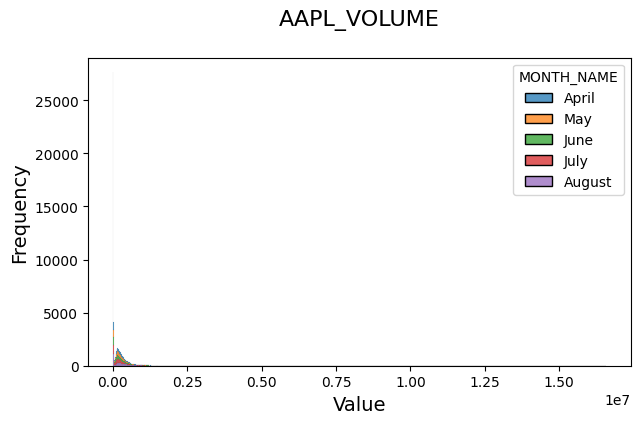

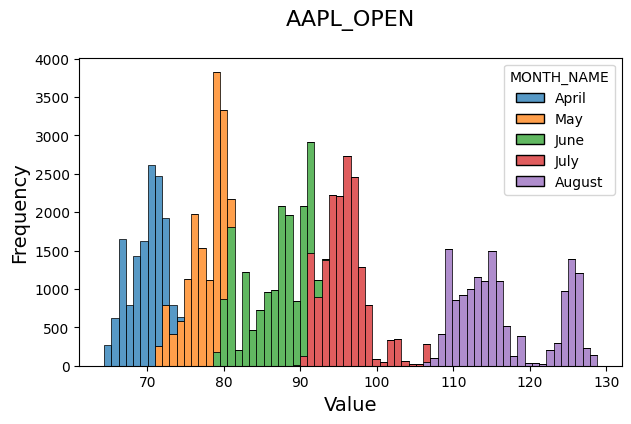

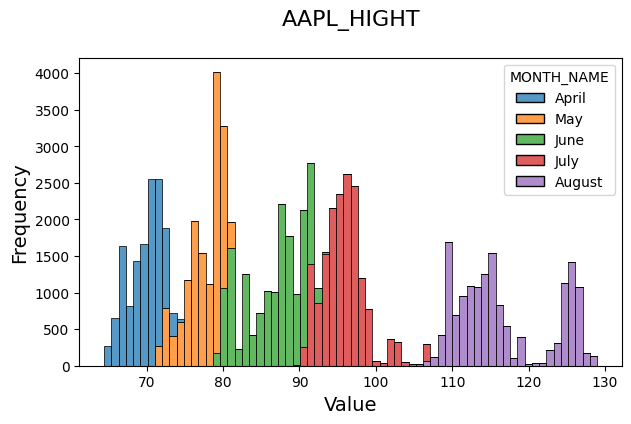

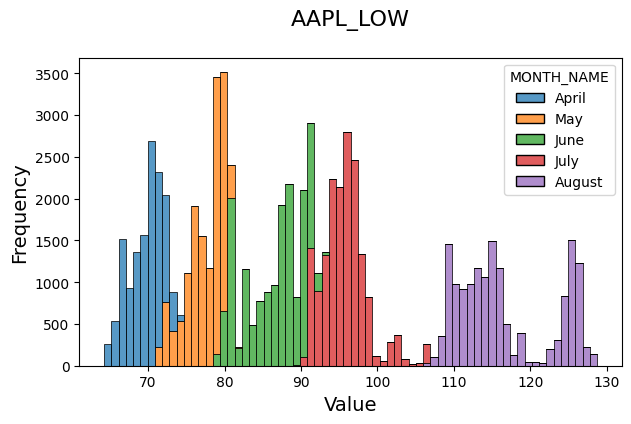

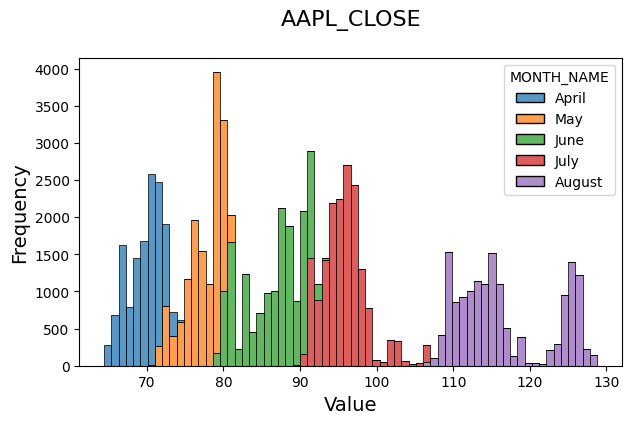

In [174]:
# Assuming 'data' is your DataFrame and it has a 'MONTH_NAME' column
for c in data.columns[0:5]:
    plt.figure(figsize=(7, 4))
    sns.histplot(data, x=c, hue='MONTH_NAME', multiple="stack")
    plt.title("{}\n".format(c), fontsize=16)
    plt.xlabel("Value", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)
    plt.show()

/var/folders/kt/fp5_2bc96kzgc81v4z1cx8500000gn/T/ipykernel_56340/27438164.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MONTH_NAME', y=c, data=data, palette='deep')


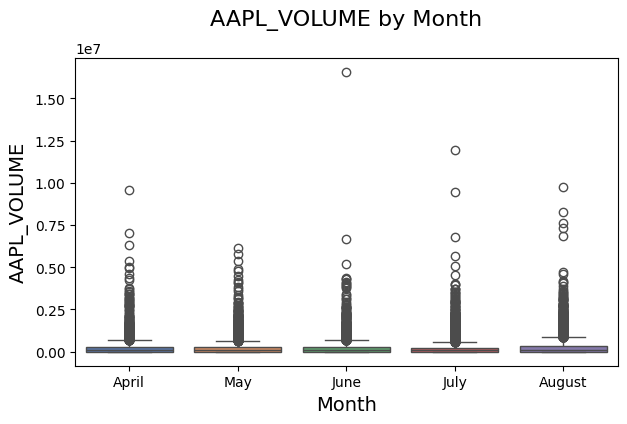

/var/folders/kt/fp5_2bc96kzgc81v4z1cx8500000gn/T/ipykernel_56340/27438164.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MONTH_NAME', y=c, data=data, palette='deep')


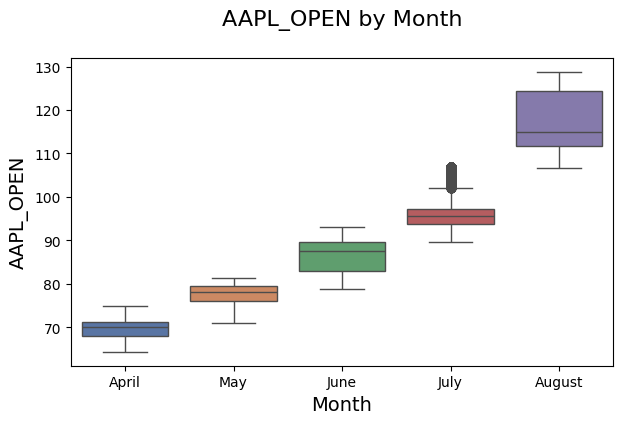

/var/folders/kt/fp5_2bc96kzgc81v4z1cx8500000gn/T/ipykernel_56340/27438164.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MONTH_NAME', y=c, data=data, palette='deep')


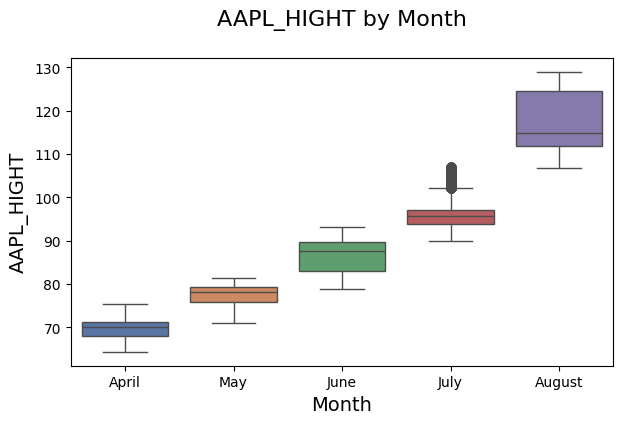

/var/folders/kt/fp5_2bc96kzgc81v4z1cx8500000gn/T/ipykernel_56340/27438164.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MONTH_NAME', y=c, data=data, palette='deep')


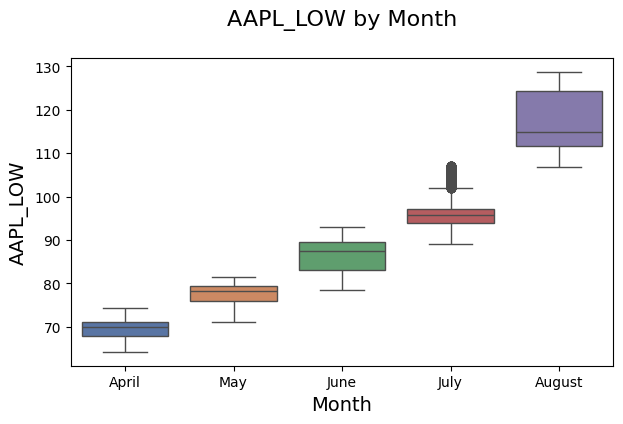

/var/folders/kt/fp5_2bc96kzgc81v4z1cx8500000gn/T/ipykernel_56340/27438164.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MONTH_NAME', y=c, data=data, palette='deep')


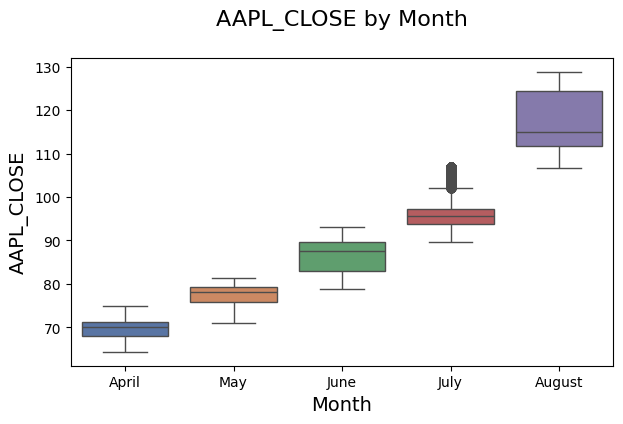

In [175]:
for c in data.columns[0:5]:
    plt.figure(figsize=(7, 4))
    
    # You can specify a palette here. For example, "viridis", "plasma", "rainbow", etc.
    sns.boxplot(x='MONTH_NAME', y=c, data=data, palette='deep')
    
    plt.title("{} by Month\n".format(c), fontsize=16)
    plt.xlabel("Month", fontsize=14)
    plt.ylabel(c, fontsize=14)
    plt.show()

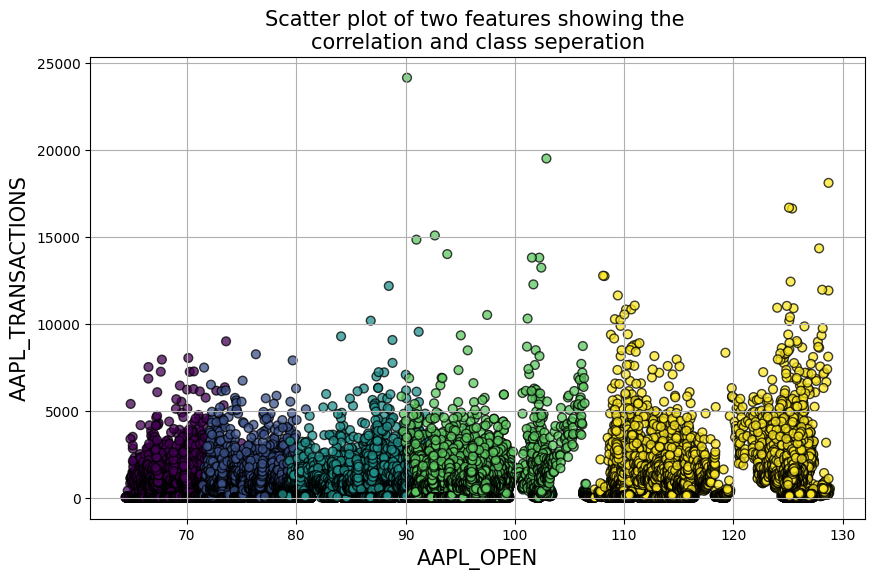

In [176]:
# Visualization on scatter plot of two features showing correlation
plt.figure(figsize=(10,6))
plt.scatter(data['AAPL_OPEN'],data['AAPL_TRANSACTIONS'],c=data['MONTH'],edgecolors='k',alpha=0.75 ,s=40)
plt.grid(True)
plt.title("Scatter plot of two features showing the \ncorrelation and class seperation",fontsize=15)
plt.xlabel("AAPL_OPEN",fontsize=15)
plt.ylabel("AAPL_TRANSACTIONS",fontsize=15)
plt.show()

In [177]:
# Drop the columns Month and Year
data = data.drop('MONTH', axis=1)
data = data.drop('MONTH_NAME', axis=1)
data = data.drop('YEAR', axis=1)
print(data.head())

                     AAPL_VOLUME  AAPL_OPEN  AAPL_HIGHT  AAPL_LOW  AAPL_CLOSE  \
DATE                                                                            
2020-04-07 12:17:00      14256.0    67.3500     67.3625   67.3275     67.3375   
2020-04-07 12:18:00      16552.0    67.3501     67.3625   67.3250     67.3250   
2020-04-07 12:19:00      80172.0    67.3250     67.4475   67.3250     67.4225   
2020-04-07 12:20:00     183740.0    67.4475     67.4700   67.3125     67.3700   
2020-04-07 12:21:00      35372.0    67.3500     67.3850   67.2975     67.2975   

                     AAPL_VW  AAPL_TRANSACTIONS  
DATE                                             
2020-04-07 12:17:00  67.3454                 45  
2020-04-07 12:18:00  67.3407                 57  
2020-04-07 12:19:00  67.3937                149  
2020-04-07 12:20:00  67.3671                159  
2020-04-07 12:21:00  67.3469                102  


In [178]:
# Drop the columns Month and Year
data2 = data2.drop('MONTH', axis=1)
data2 = data2.drop('MONTH_NAME', axis=1)
data2 = data2.drop('YEAR', axis=1)
print(data2.head())

                     AAPL_VOLUME  AAPL_OPEN  AAPL_HIGHT  AAPL_LOW  AAPL_CLOSE  \
DATE                                                                            
2020-04-07 12:17:00      14256.0    67.3500     67.3625   67.3275     67.3375   
2020-04-07 12:18:00      16552.0    67.3501     67.3625   67.3250     67.3250   
2020-04-07 12:19:00      80172.0    67.3250     67.4475   67.3250     67.4225   
2020-04-07 12:20:00     183740.0    67.4475     67.4700   67.3125     67.3700   
2020-04-07 12:21:00      35372.0    67.3500     67.3850   67.2975     67.2975   

                     AAPL_VW  AAPL_TRANSACTIONS  
DATE                                             
2020-04-07 12:17:00  67.3454                 45  
2020-04-07 12:18:00  67.3407                 57  
2020-04-07 12:19:00  67.3937                149  
2020-04-07 12:20:00  67.3671                159  
2020-04-07 12:21:00  67.3469                102  


In [179]:
data_cols = ['DATE', 'OPEN', 'HIGHT', 'LOW', 'CLOSE', 'VW', 'VOLUME']


var_cols = ['HIGHT',
       'CLOSE', 'OPEN', 'LOW',
       'VOLUME','EOM_w14','FI_w13']

# For each of calculated column, we add the ticker code, as standardized by class 𝙳𝚊𝚝𝚊𝙻𝚘𝚊𝚍𝚎𝚛
var_cols = [ticker+'_'+col for col in var_cols]
norm_cols = [col + '_norm' for col in var_cols]

In [180]:
print(norm_cols)

['AAPL_HIGHT_norm', 'AAPL_CLOSE_norm', 'AAPL_OPEN_norm', 'AAPL_LOW_norm', 'AAPL_VOLUME_norm', 'AAPL_EOM_w14_norm', 'AAPL_FI_w13_norm']


# Apply Indicators

In [181]:
# Process data normalization
norm_data = True

# Select Indicator transformer
ind_processor = Indicators(ticker = ticker, norm_data = True, calc_all = False, list_ind = ["EOM","FI"])

# Calculate Indicators over input dataframe
df_in = ind_processor.fit_transform(data)
print(df_in)

if (norm_data):
    df_norm = ind_processor.data_norm
    # print(df_norm)

                     AAPL_VOLUME  AAPL_OPEN  AAPL_HIGHT  AAPL_LOW  AAPL_CLOSE  \
DATE                                                                            
2020-04-07 12:17:00      14256.0    67.3500     67.3625   67.3275     67.3375   
2020-04-07 12:18:00      16552.0    67.3501     67.3625   67.3250     67.3250   
2020-04-07 12:19:00      80172.0    67.3250     67.4475   67.3250     67.4225   
2020-04-07 12:20:00     183740.0    67.4475     67.4700   67.3125     67.3700   
2020-04-07 12:21:00      35372.0    67.3500     67.3850   67.2975     67.2975   
...                          ...        ...         ...       ...         ...   
2020-08-28 21:53:00       5536.0   125.0550    125.0675  125.0550    125.0675   
2020-08-28 21:54:00       4312.0   125.0950    125.0950  125.0950    125.0950   
2020-08-28 21:55:00       5284.0   125.1000    125.1050  125.1000    125.1050   
2020-08-28 21:56:00       4568.0   125.1250    125.1250  125.1250    125.1250   
2020-08-28 21:57:00      120

In [182]:
df_results=df_norm[norm_cols].dropna(axis=0)

In [183]:
# Display dataframe with Indicators of normalized data
# if (norm_data):
#     display(df_norm[norm_cols].dropna(axis=0))
print(df_results)

                     AAPL_HIGHT_norm  AAPL_CLOSE_norm  AAPL_OPEN_norm  \
DATE                                                                    
2020-04-07 12:30:00        -0.908831        -0.908573       -0.909874   
2020-04-07 12:31:00        -0.908655        -0.908629       -0.908012   
2020-04-07 12:32:00        -0.907261        -0.906998       -0.905763   
2020-04-07 12:33:00        -0.905713        -0.906222       -0.904134   
2020-04-07 12:34:00        -0.904939        -0.905523       -0.904910   
...                              ...              ...             ...   
2020-08-28 21:53:00         0.878387         0.883709        0.883037   
2020-08-28 21:54:00         0.879238         0.884563        0.884278   
2020-08-28 21:55:00         0.879548         0.884874        0.884433   
2020-08-28 21:56:00         0.880167         0.885495        0.885209   
2020-08-28 21:57:00         0.881251         0.886582        0.885209   

                     AAPL_LOW_norm  AAPL_VOLUME_no

## Are the features independent? Plot correlation matrix

# Principal Component Analysis
## Data scaling
### PCA requires scaling/normalization of the data to work properly

In [184]:
# Assuming data is already loaded with the dataset
# Create an instance of Data PCA with the dataset
pca_instance = PrincipalComponentAnalysis(data)
# print(data)

In [185]:
# Preprocess the data
preprocess_data = pca_instance.preprocess_data()
print(preprocess_data)

[[-5.65728522e-01 -1.38421814e+00 -1.38511084e+00 ...             nan
              nan             nan]
 [-5.58638203e-01 -1.38421206e+00 -1.38511084e+00 ... -5.54883890e-03
              nan             nan]
 [-3.62172140e-01 -1.38573753e+00 -1.37994655e+00 ...  3.46098832e-02
              nan             nan]
 ...
 [-5.93435116e-01  2.12557066e+00  2.12311463e+00 ...  3.34712173e-04
   1.82159498e-03 -1.79185237e-02]
 [-5.95646208e-01  2.12709005e+00  2.12432975e+00 ... -3.87069170e-03
  -2.32876880e-02 -1.80163799e-02]
 [-5.72682963e-01  2.12709005e+00  2.12645623e+00 ...  2.63649617e-02
  -2.73338535e-02 -1.61255053e-02]]


In [186]:
dfx = pd.DataFrame(data=preprocess_data, columns=data.columns[0:])

In [187]:
# data = data.drop('AAPL_CLOSE_returns', axis=1)
# data = data.drop('MONTH_NAME', axis=1)
# data = data.drop('YEAR', axis=1)
# print(data.head())
dfx.dropna()

,AAPL_VOLUME,AAPL_OPEN,AAPL_HIGHT,AAPL_LOW,AAPL_CLOSE,AAPL_VW,AAPL_TRANSACTIONS,AAPL_EOM_w14,AAPL_EMV_w14,AAPL_FI_w13
14,-0.569620,-1.385738,-1.385567,-1.384105,-1.384370,-1.384553,-0.625449,0.049614,-0.040082,-0.026102
15,-0.590026,-1.381331,-1.382832,-1.379697,-1.381179,-1.381155,-0.633695,0.009754,-0.036074,-0.023565
16,-0.582046,-1.378141,-1.379795,-1.379545,-1.379660,-1.378961,-0.636051,0.082815,-0.023449,-0.022058
17,-0.530104,-1.379660,-1.378276,-1.378329,-1.378293,-1.378207,-0.620737,0.024561,-0.016668,-0.018628
18,-0.542024,-1.378293,-1.377668,-1.376810,-1.378444,-1.377216,-0.606602,0.015042,0.007479,-0.019502
...,...,...,...,...,...,...,...,...,...,...
74995,-0.592657,2.122836,2.120836,2.125647,2.123582,2.123662,-0.604246,-0.000526,-0.006439,-0.017547
74996,-0.596437,2.125267,2.122507,2.128079,2.125253,2.125625,-0.612492,-0.003871,-0.000389,-0.017534
74997,-0.593435,2.125571,2.123115,2.128383,2.125861,2.125886,-0.581865,0.000335,0.001822,-0.017919
74998,-0.595646,2.127090,2.124330,2.129903,2.127076,2.127035,-0.596000,-0.003871,-0.023288,-0.018016


In [188]:
print(dfx)

       AAPL_VOLUME  AAPL_OPEN  AAPL_HIGHT  AAPL_LOW  AAPL_CLOSE   AAPL_VW  \
0        -0.565729  -1.384218   -1.385111 -1.383953   -1.384978 -1.384480   
1        -0.558638  -1.384212   -1.385111 -1.384105   -1.385738 -1.384765   
2        -0.362172  -1.385738   -1.379947 -1.384105   -1.379812 -1.381544   
3        -0.042342  -1.378293   -1.378580 -1.384865   -1.383003 -1.383161   
4        -0.500520  -1.384218   -1.383744 -1.385777   -1.387409 -1.384389   
...            ...        ...         ...       ...         ...       ...   
74995    -0.592657   2.122836    2.120836  2.125647    2.123582  2.123662   
74996    -0.596437   2.125267    2.122507  2.128079    2.125253  2.125625   
74997    -0.593435   2.125571    2.123115  2.128383    2.125861  2.125886   
74998    -0.595646   2.127090    2.124330  2.129903    2.127076  2.127035   
74999    -0.572683   2.127090    2.126456  2.129903    2.129204  2.127819   

       AAPL_TRANSACTIONS  AAPL_EOM_w14  AAPL_EMV_w14  AAPL_FI_w13  
0      

In [189]:
dfx.describe()

,AAPL_VOLUME,AAPL_OPEN,AAPL_HIGHT,AAPL_LOW,AAPL_CLOSE,AAPL_VW,AAPL_TRANSACTIONS,AAPL_EOM_w14,AAPL_EMV_w14,AAPL_FI_w13
count,7.500000e+04,7.500000e+04,7.500000e+04,7.500000e+04,7.500000e+04,7.500000e+04,7.500000e+04,7.499900e+04,7.498600e+04,7.498700e+04
mean,-1.402138e-17,8.246085e-16,-2.789117e-16,-6.427096e-16,-2.971016e-16,3.516713e-16,3.941144e-17,1.533609e-18,1.373972e-18,-4.927284e-18
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-6.085175e-01,-1.565937e+00,-1.564798e+00,-1.571576e+00,-1.563201e+00,-1.613314e+00,-6.867036e-01,-6.069264e+01,-1.582669e+01,-3.897643e+01
25%,-5.934351e-01,-7.845532e-01,-7.848378e-01,-7.834787e-01,-7.840997e-01,-7.846160e-01,-6.596104e-01,-9.926165e-03,-2.816360e-02,-4.679944e-02
50%,-2.684539e-01,-9.881497e-02,-9.889821e-02,-9.826993e-02,-9.881992e-02,-9.881418e-02,-2.532119e-01,-3.870692e-03,-1.413182e-02,-2.215108e-02
75%,2.606673e-01,4.451263e-01,4.451752e-01,4.450942e-01,4.451193e-01,4.453423e-01,3.027882e-01,1.959568e-03,-1.130149e-04,2.044253e-02
max,5.057178e+01,2.351960e+00,2.359457e+00,2.350909e+00,2.351186e+00,2.350581e+00,2.773645e+01,1.754811e+02,4.604693e+01,7.076259e+01


/Users/akshatkhara/Desktop/Study Material/Semester 3/Machine Learning in Finance/ML-in-Finance/notebooks/../src/finance_ml/principal_component_analysis/principal_component_analysis.py:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(labels,fontsize=9)
/Users/akshatkhara/Desktop/Study Material/Semester 3/Machine Learning in Finance/ML-in-Finance/notebooks/../src/finance_ml/principal_component_analysis/principal_component_analysis.py:91: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_yticklabels(labels,fontsize=9)


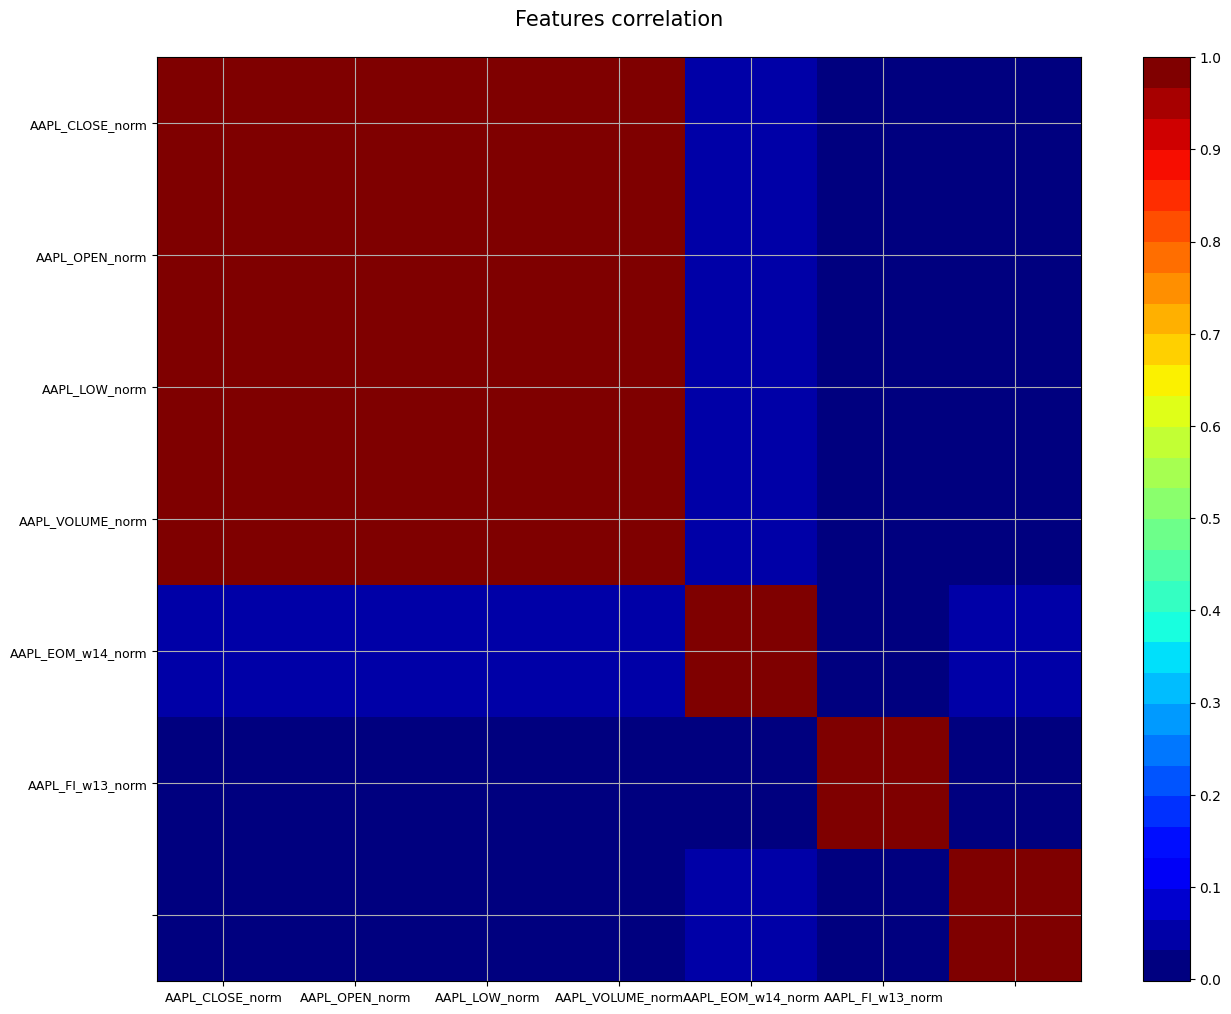

In [200]:
# Apply the PrincipalComponentAnalysis class from src.finance_ml.principal_component_analysis.principal_component_analysis import PrincipalComponentAnalysis
pca_instance = PrincipalComponentAnalysis(data2)
correlation_matrix = pca_instance.correlation_matrix(df_results)

# PCA class import and analysis

In [201]:
# Apply PCA
(print(data))
apply_pca = pca_instance.apply_pca(df_results)

                     AAPL_VOLUME  AAPL_OPEN  AAPL_HIGHT  AAPL_LOW  AAPL_CLOSE  \
DATE                                                                            
2020-04-07 12:17:00      14256.0    67.3500     67.3625   67.3275     67.3375   
2020-04-07 12:18:00      16552.0    67.3501     67.3625   67.3250     67.3250   
2020-04-07 12:19:00      80172.0    67.3250     67.4475   67.3250     67.4225   
2020-04-07 12:20:00     183740.0    67.4475     67.4700   67.3125     67.3700   
2020-04-07 12:21:00      35372.0    67.3500     67.3850   67.2975     67.2975   
...                          ...        ...         ...       ...         ...   
2020-08-28 21:53:00       5536.0   125.0550    125.0675  125.0550    125.0675   
2020-08-28 21:54:00       4312.0   125.0950    125.0950  125.0950    125.0950   
2020-08-28 21:55:00       5284.0   125.1000    125.1050  125.1000    125.1050   
2020-08-28 21:56:00       4568.0   125.1250    125.1250  125.1250    125.1250   
2020-08-28 21:57:00      120

## Plot the explained variance ratio

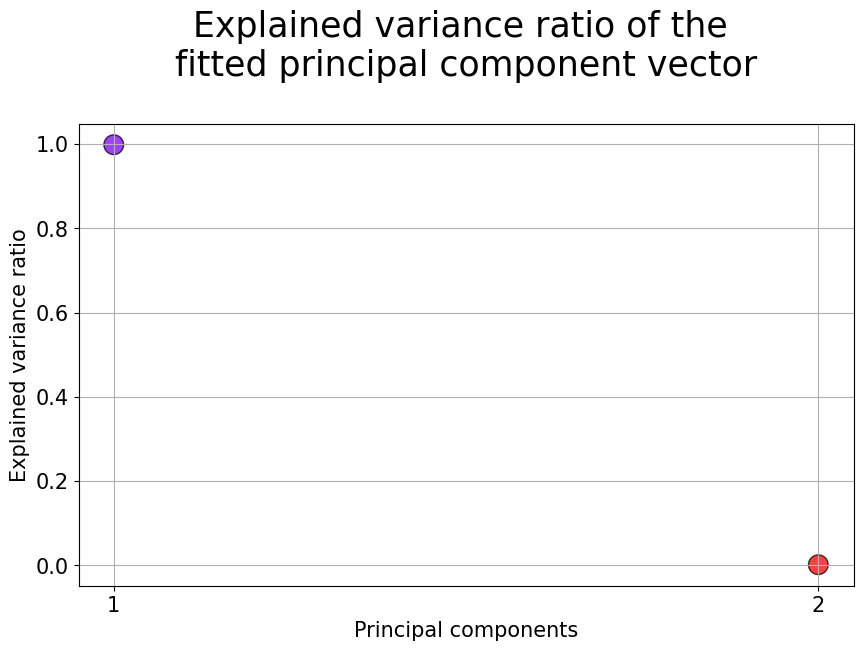

In [202]:
plot_explained_variance_component = pca_instance.plot_explained_variance_component(apply_pca)

The above plot means that the 
 principal component explains about 84% of the total variance in the data and the 
 component explians further 16%. Therefore, if we just consider first two components, they together explain 100% of the total variance.

In [203]:
# Print explained variance
pca_instance.explained_variance()

Principal Component 1: 1.00
Principal Component 2: 0.00


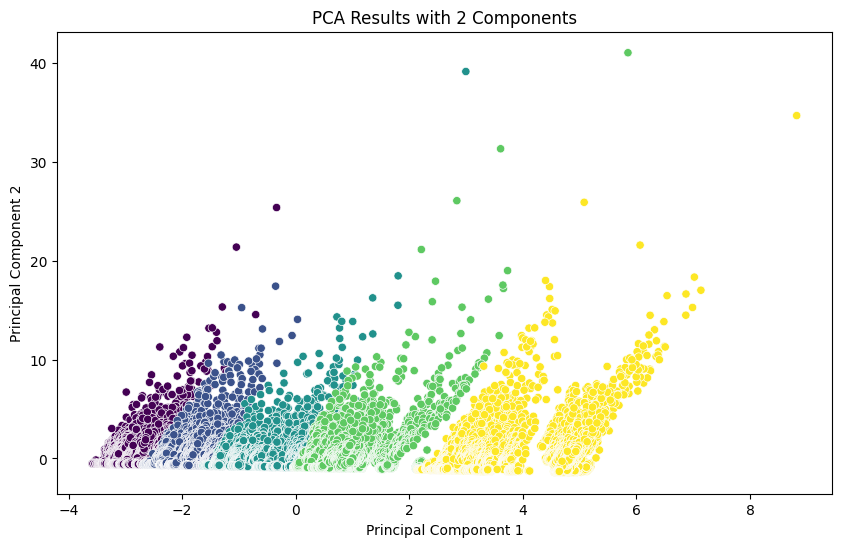

In [204]:
# Plot PCA results
colours = data.index.month
pca_instance.plot_pca_results(colours)